In [2]:
import pandas as pd
import seaborn as sns
import duckdb as db
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_DR1IFF.XPT')

In [7]:
df2 = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_DR2IFF.XPT')

In [8]:
df1_cols = df1.columns
df1_cols

Index(['SEQN', 'WTDRD1PP', 'WTDR2DPP', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER',
       'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM',
       'DR1CCMTX', 'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD',
       'DR1IGRMS', 'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE',
       'DR1ITFAT', 'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1ICHOL', 'DR1IATOC',
       'DR1IATOA', 'DR1IRET', 'DR1IVARA', 'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP',
       'DR1ILYCO', 'DR1ILZ', 'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6',
       'DR1IFOLA', 'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12',
       'DR1IB12A', 'DR1IVC', 'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS',
       'DR1IMAGN', 'DR1IIRON', 'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA',
       'DR1ISELE', 'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040',
       'DR1IS060', 'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160',
       'DR1IS180', 'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182',
       

In [9]:
df2_cols = df2.columns
df2_cols

Index(['SEQN', 'WTDRD1PP', 'WTDR2DPP', 'DR2ILINE', 'DR2DRSTZ', 'DR2EXMER',
       'DRABF', 'DRDINT', 'DR2DBIH', 'DR2DAY', 'DR2LANG', 'DR2CCMNM',
       'DR2CCMTX', 'DR2_020', 'DR2_030Z', 'DR2FS', 'DR2_040Z', 'DR2IFDCD',
       'DR2IGRMS', 'DR2IKCAL', 'DR2IPROT', 'DR2ICARB', 'DR2ISUGR', 'DR2IFIBE',
       'DR2ITFAT', 'DR2ISFAT', 'DR2IMFAT', 'DR2IPFAT', 'DR2ICHOL', 'DR2IATOC',
       'DR2IATOA', 'DR2IRET', 'DR2IVARA', 'DR2IACAR', 'DR2IBCAR', 'DR2ICRYP',
       'DR2ILYCO', 'DR2ILZ', 'DR2IVB1', 'DR2IVB2', 'DR2INIAC', 'DR2IVB6',
       'DR2IFOLA', 'DR2IFA', 'DR2IFF', 'DR2IFDFE', 'DR2ICHL', 'DR2IVB12',
       'DR2IB12A', 'DR2IVC', 'DR2IVD', 'DR2IVK', 'DR2ICALC', 'DR2IPHOS',
       'DR2IMAGN', 'DR2IIRON', 'DR2IZINC', 'DR2ICOPP', 'DR2ISODI', 'DR2IPOTA',
       'DR2ISELE', 'DR2ICAFF', 'DR2ITHEO', 'DR2IALCO', 'DR2IMOIS', 'DR2IS040',
       'DR2IS060', 'DR2IS080', 'DR2IS100', 'DR2IS120', 'DR2IS140', 'DR2IS160',
       'DR2IS180', 'DR2IM161', 'DR2IM181', 'DR2IM201', 'DR2IM221', 'DR2IP182',
       

In [10]:
df1_cols == df2_cols

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Removing the rows with missing values i.e. when DR1_030Z = 99.0

In [11]:
df1 = df1[df1.DR1_030Z != 99.0]

#### Merging the similar columns together

In [13]:
df1['DR1_030Z'] = df1['DR1_030Z'].replace(
    {10.0: 1.0, 11.0: 2.0, 13.0: 6.0, 14.0: 3.0, 16.0: 6.0, 18.0: 6.0, 19.0: 7.0})

### Using duckdb SQL to find the distinct eating occasions per SEQN

In [14]:
q1_1 = db.sql('select distinct SEQN, DR1_030Z from df1').df()

In [15]:
q1_1['Eating_Occasion'] = q1_1['DR1_030Z'].map({1.0: 'Breakfast',
                                                2.0: 'Lunch',
                                                3.0: 'Dinner',
                                                4.0: 'Supper',
                                                5.0: 'Brunch',
                                                6.0: 'Snack',
                                                7.0: 'Drink',
                                                8.0: 'Infant feeding',
                                                9.0: 'Extended consumption',
                                                12.0: 'Comida',
                                                15.0: 'Entre comida',
                                                17.0: 'Bocadillo'})


In [16]:
q1_1


,SEQN,DR1_030Z,Eating_Occasion
0,109263.0,2.0,Lunch
1,109264.0,2.0,Lunch
2,109264.0,7.0,Drink
3,109265.0,6.0,Snack
4,109270.0,1.0,Breakfast
...,...,...,...
51358,123790.0,2.0,Lunch
51359,123880.0,6.0,Snack
51360,123823.0,3.0,Dinner
51361,124422.0,1.0,Breakfast


__Distribution of frequencies of eating occasions__

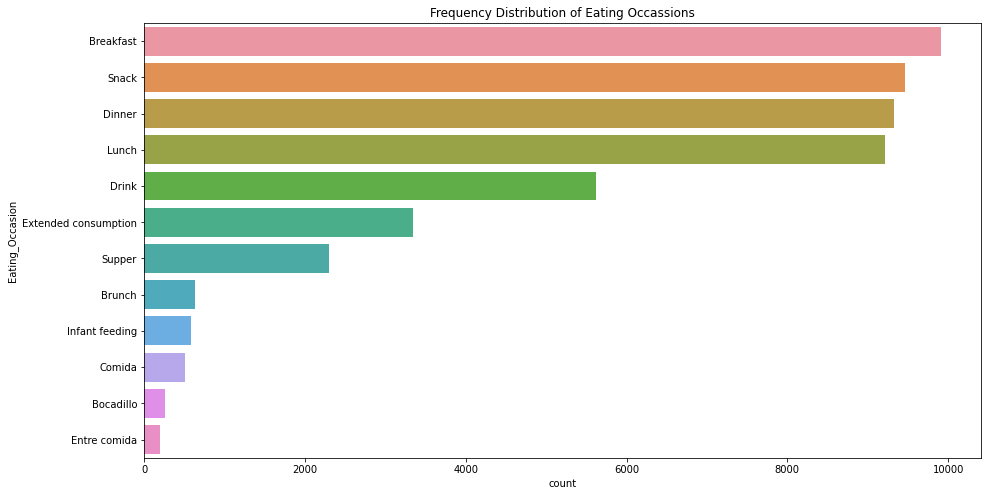

In [17]:
plt.figure(figsize=(15, 8))
hist = sns.countplot(data=q1_1, y="Eating_Occasion", order=q1_1['Eating_Occasion'].value_counts(
).index).set_title("Frequency Distribution of Eating Occassions")
plt.show()


In [18]:
df1['DR1_030Z'].value_counts()


3.0     41852
2.0     37994
1.0     36197
6.0     32512
7.0     11703
4.0      9765
8.0      4383
9.0      4077
12.0     2203
5.0      2080
17.0      632
15.0      510
Name: DR1_030Z, dtype: int64

In [19]:
df1.SEQN.unique().size


12632

Finding the total energy (in Kcal) for different food occassions

In [20]:
q1_2 = db.sql("select d.SEQN, q.DR1_030Z, q.Eating_Occasion, SUM(d.DR1IKCAL) as Total_Calories from df1 d join q1_1 q on d.SEQN = q.SEQN and d.DR1_030Z = q.DR1_030Z group by d.SEQN, q.DR1_030Z, q.Eating_Occasion order by d.SEQN").df()
q1_2

,SEQN,DR1_030Z,Eating_Occasion,Total_Calories
0,109263.0,1.0,Breakfast,1.870000e+02
1,109263.0,3.0,Dinner,2.880000e+02
2,109263.0,6.0,Snack,2.940000e+02
3,109263.0,9.0,Extended consumption,5.397605e-79
4,109263.0,2.0,Lunch,6.330000e+02
...,...,...,...,...
51358,124820.0,3.0,Dinner,5.440000e+02
51359,124821.0,4.0,Supper,1.231000e+03
51360,124821.0,6.0,Snack,1.660000e+02
51361,124821.0,7.0,Drink,5.397605e-79


__Distribution of total calories of each eating occasion__

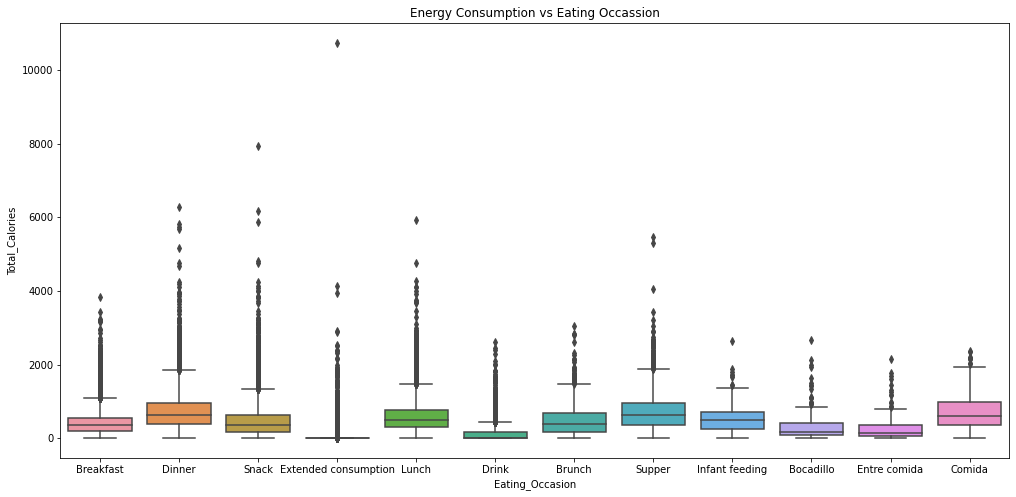

In [21]:
plt.figure(figsize=(17, 8))
box_p = sns.boxplot(data=q1_2, x="Eating_Occasion", y="Total_Calories").set_title(
    "Energy Consumption vs Eating Occassion")
#bar.set_xticklabels("Eating Occasions")
plt.show()

### What is the maximum calories consumed for each of the eating occasions?

In [23]:
db.sql("select DR1_030Z,max(Total_Calories) from q1_2 group by DR1_030Z")

┌──────────┬───────────────────────┐
│ DR1_030Z │ max("Total_Calories") │
│  double  │        double         │
├──────────┼───────────────────────┤
│      1.0 │                3825.0 │
│      3.0 │                6275.0 │
│      6.0 │                7937.0 │
│      9.0 │               10742.0 │
│      2.0 │                5926.0 │
│      7.0 │                2611.0 │
│      5.0 │                3045.0 │
│      4.0 │                5454.0 │
│      8.0 │                2640.0 │
│     17.0 │                2657.0 │
│     15.0 │                2161.0 │
│     12.0 │                2372.0 │
├──────────┴───────────────────────┤
│ 12 rows                2 columns │
└──────────────────────────────────┘

#### What's the Average Energy consumed per eating occassion by Respondents?

Before evaluating, we have to remove the outliers.
We can remove the maximum total Calories intake of one meal greater than 3000 Kcal.

In [24]:
q1_3 = db.sql("select DR1_030Z, AVG(Total_Calories) as Average_Kcal from q1_2  where Total_Calories < 3000  group by DR1_030Z order by Average_Kcal desc").df()
q1_3

,DR1_030Z,Average_Kcal
0,3.0,727.129588
1,4.0,714.762402
2,12.0,694.123772
3,2.0,594.157786
4,8.0,516.366228
5,5.0,507.015823
6,6.0,465.271494
7,1.0,419.752422
8,17.0,307.157088
9,15.0,278.923077


Infant Feeding occassion has a lot null values

In [26]:
db.sql('select * from q1_2 where Total_Calories is null')


┌──────────┬──────────┬─────────────────┬────────────────┐
│   SEQN   │ DR1_030Z │ Eating_Occasion │ Total_Calories │
│  double  │  double  │     varchar     │     double     │
├──────────┼──────────┼─────────────────┼────────────────┤
│ 109357.0 │      8.0 │ Infant feeding  │           NULL │
│ 109462.0 │      8.0 │ Infant feeding  │           NULL │
│ 109487.0 │      8.0 │ Infant feeding  │           NULL │
│ 109605.0 │      8.0 │ Infant feeding  │           NULL │
│ 109660.0 │      8.0 │ Infant feeding  │           NULL │
│ 109680.0 │      8.0 │ Infant feeding  │           NULL │
│ 109736.0 │      8.0 │ Infant feeding  │           NULL │
│ 109737.0 │      8.0 │ Infant feeding  │           NULL │
│ 109870.0 │      8.0 │ Infant feeding  │           NULL │
│ 109967.0 │      7.0 │ Drink           │           NULL │
│     ·    │       ·  │   ·             │             ·  │
│     ·    │       ·  │   ·             │             ·  │
│     ·    │       ·  │   ·             │             · 

### Since Breakfast is the most common eating occassion, so let's study the different types of nutrients intake and their quantities

#### Protein Intake in Breakfast

In [27]:
q1_4 = db.sql(
    'select SUM(DR1IPROT) as Total_Protein_Intake from df1 where DR1_030Z = 1.0 and DR1IPROT is not null group by SEQN').df()

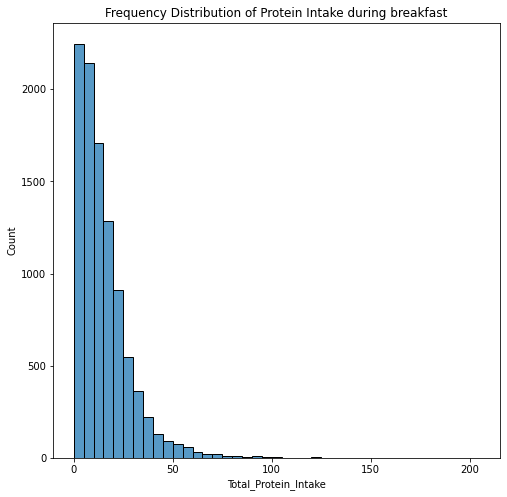

In [28]:
plt.figure(figsize=(8, 8))
hist = sns.histplot(data=q1_4, x="Total_Protein_Intake", bins=5, binwidth=5).set_title(
    "Frequency Distribution of Protein Intake during breakfast")
plt.show()


In [29]:
from scipy.stats import norm
import statistics

mean = statistics.mean(q1_4['Total_Protein_Intake'])
median = statistics.median(q1_4['Total_Protein_Intake'])


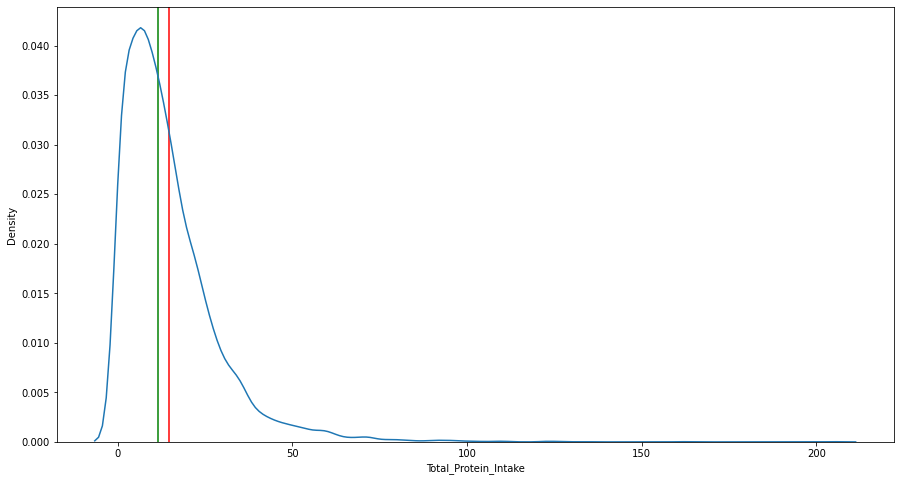

In [32]:
plt.figure(figsize=(15, 8))
plt.axvline(mean, color='red')
plt.axvline(median, color='green')
hist = sns.kdeplot(data=q1_4, x="Total_Protein_Intake")
plt.show()

Based on the figure, the graph has a right skewed distribution as the median is smaller than mean.

#### Carbohydrate intake in Breakfast

In [33]:
q1_5 = db.sql(
    'select SUM(DR1ICARB) as Total_Carb_Intake from df1 where DR1_030Z = 1.0 and DR1ICARB is not null group by SEQN').df()
q1_5

,Total_Carb_Intake
0,27.23
1,39.15
2,115.50
3,3.10
4,31.31
...,...
9909,28.89
9910,23.68
9911,43.92
9912,58.16


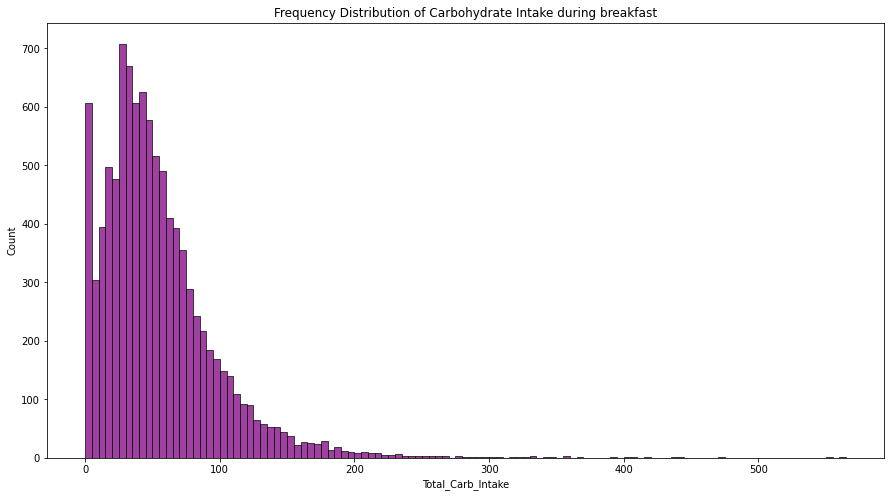

In [57]:
plt.figure(figsize=(15, 8))
hist = sns.histplot(data=q1_5, x="Total_Carb_Intake", bins=5, binwidth=5, color="purple").set_title(
    "Frequency Distribution of Carbohydrate Intake during breakfast")
plt.show()

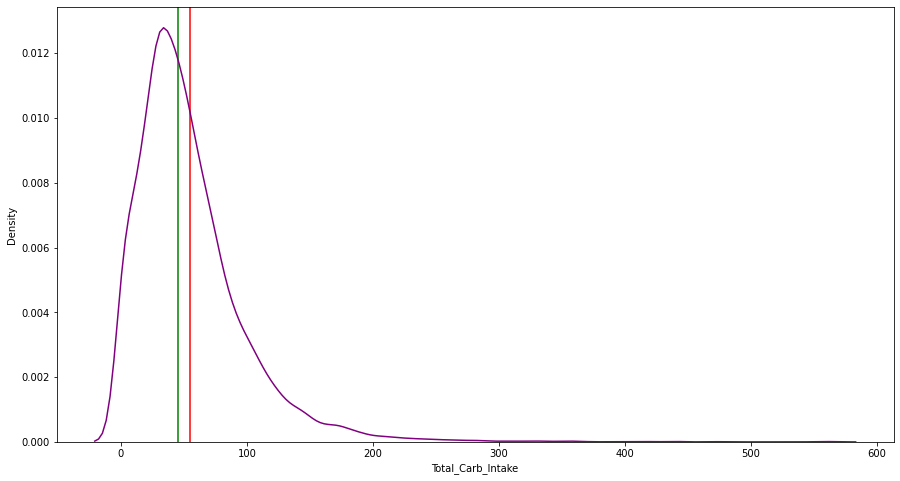

In [58]:
plt.figure(figsize=(15, 8))
plt.axvline(statistics.mean(q1_5['Total_Carb_Intake']), color='red')
plt.axvline(statistics.median(q1_5['Total_Carb_Intake']), color='green')
hist = sns.kdeplot(data=q1_5, x="Total_Carb_Intake", color="purple")
plt.show()

#### Fat intake in Breakfast

In [43]:
q1_6 = db.sql(
    'select SUM(DR1ITFAT) as Total_Fat_Intake from df1 where DR1_030Z = 1.0 and DR1ITFAT is not null group by SEQN').df()
q1_6

,Total_Fat_Intake
0,9.56
1,30.43
2,25.49
3,7.96
4,2.12
...,...
9909,33.54
9910,41.55
9911,3.74
9912,15.92


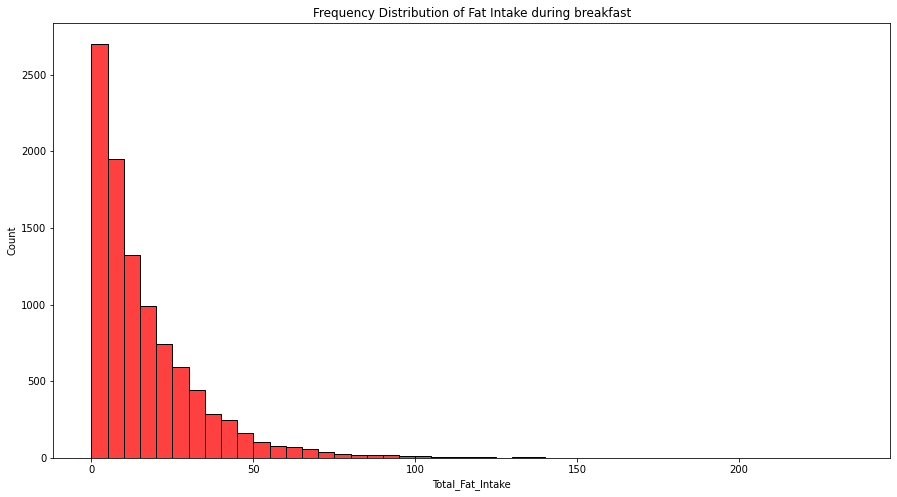

In [53]:
plt.figure(figsize=(15, 8))
hist = sns.histplot(data=q1_6, x="Total_Fat_Intake", bins=5, binwidth=5, color="red").set_title(
    "Frequency Distribution of Fat Intake during breakfast")
plt.show()

#### Sugar intake in Breakfast

In [49]:
q1_7 = db.sql(
    'select SUM(DR1ISUGR) as Total_Sugar_Intake from df1 where DR1_030Z = 1.0 and DR1ISUGR is not null group by SEQN').df()
q1_7

,Total_Sugar_Intake
0,28.77
1,35.73
2,38.35
3,50.31
4,0.57
...,...
9909,47.24
9910,7.87
9911,7.93
9912,37.31


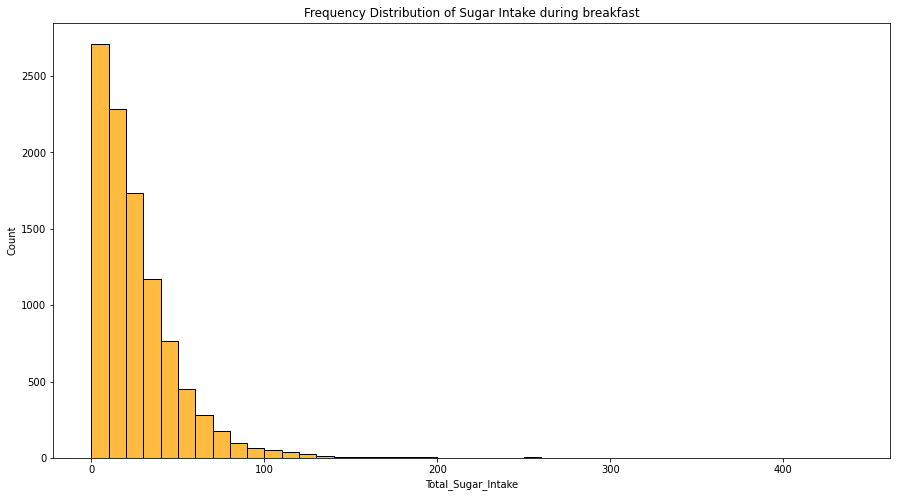

In [52]:
plt.figure(figsize=(15, 8))
hist = sns.histplot(data=q1_7, x="Total_Sugar_Intake", bins=5, binwidth=10, color="orange").set_title(
    "Frequency Distribution of Sugar Intake during breakfast")
plt.show()

## 2nd day dietary dataframe

In [36]:
df2['DR2_030Z'] = df2['DR2_030Z'].replace(
    {10.0: 1.0, 11.0: 2.0, 13.0: 6.0, 14.0: 3.0, 16.0: 6.0, 18.0: 6.0, 19.0: 7.0})

In [37]:
df1 = df1[df1.DR1_030Z != 99.0]

In [38]:
q2_1 = db.sql('select distinct SEQN, DR2_030Z from df2').df()

In [39]:
q2_1['Eating_Occasion'] = q2_1['DR2_030Z'].map({1.0: 'Breakfast',
                                                2.0: 'Lunch',
                                                3.0: 'Dinner',
                                                4.0: 'Supper',
                                                5.0: 'Brunch',
                                                6.0: 'Snack',
                                                7.0: 'Drink',
                                                8.0: 'Infant feeding',
                                                9.0: 'Extended consumption',
                                                12.0: 'Comida',
                                                15.0: 'Entre comida',
                                                17.0: 'Bocadillo'})


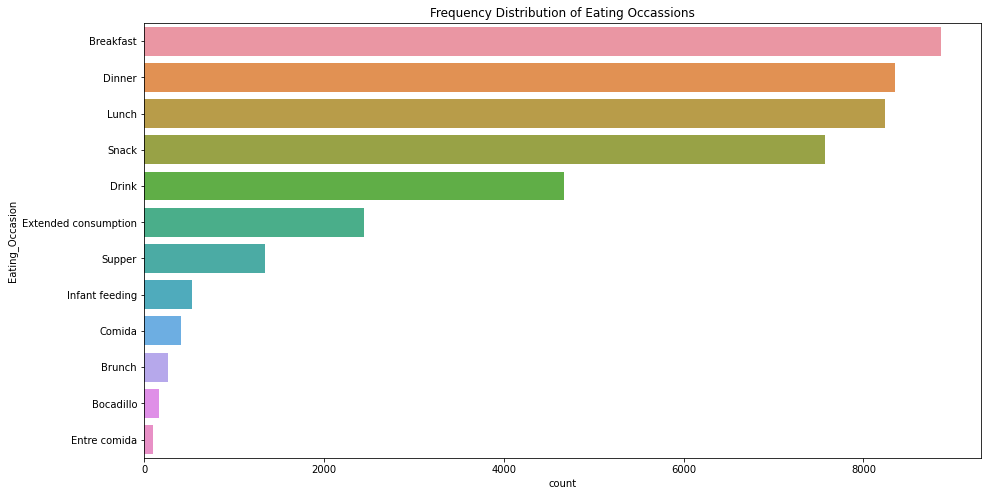

In [40]:
plt.figure(figsize=(15, 8))
hist = sns.countplot(data=q2_1, y="Eating_Occasion", order=q2_1['Eating_Occasion'].value_counts().index).set_title("Frequency Distribution of Eating Occassions")
plt.show()


In [41]:
q2_2 = db.sql(
    "select SEQN, DR2_030Z, SUM(DR2IKCAL) as Total_Calories from df2 group by SEQN, DR2_030Z").df()

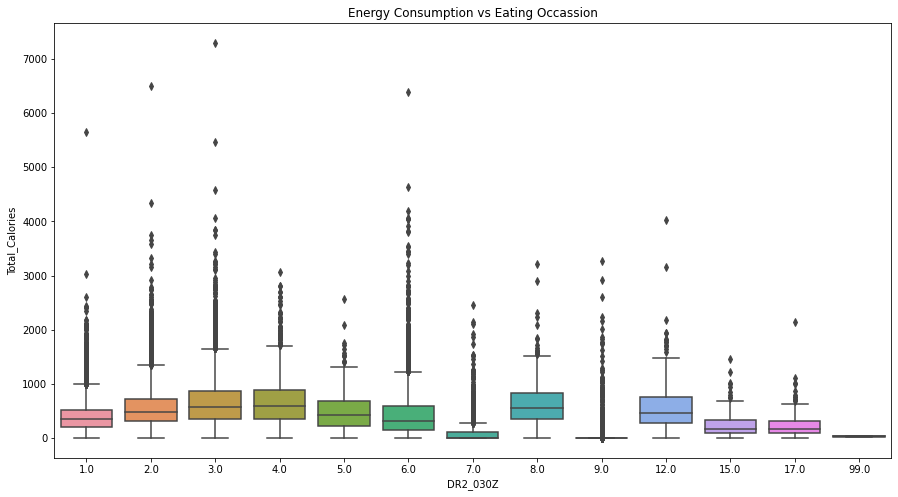

In [42]:
plt.figure(figsize=(15, 8))
box_p = sns.boxplot(data=q2_2, x="DR2_030Z", y="Total_Calories").set_title(
    "Energy Consumption vs Eating Occassion")
#bar.set_xticklabels("Eating Occasions")
plt.show()

In [ ]:
concatenated = pd.concat([df1, df2])
